## Sorting Data into spending sectors (Cafe, pub etc.)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
transaction_df = pd.read_csv('C:/Users/camer/OneDrive/Documents/Data Science MSc/DSMP/fake_transactional_data_24.csv')
transaction_df.head()

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371.0,4.00,CINEMA,01/01/2025
1,88339.0,2.40,40544,01/01/2025
2,18555.0,2.40,85149,01/01/2025
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025
4,80792.0,1.95,18555,01/01/2025


#### Preparing the data - sorting by reciever account

Many of the transcations are to personal accounts, these can be removed. The other buisness accounts can then be grouped into sectors to be able to cluster based on where people spend their money. 

Getting a list of the non-numeric receiver account transactions in the data

In [3]:
unique_values = transaction_df['to_randomly_generated_account'].unique()

buisness_accounts = []

for value in unique_values:
    if str(value).isdigit() == False:
        buisness_accounts.append(value)

In [4]:
#buisness_accounts

Sorting list of buisnesses into categories (small enough number to do manually)

In [5]:

categories = {
    'Coffee Shop': ['COFFEE_SHOP', 'HIPSTER_COFFEE_SHOP', 'TOTALLY_A_REAL_COFFEE_SHOP', 'A_CAFE', 'GOURMET_COFFEE_SHOP', 'A_LOCAL_COFFEE_SHOP', 'WE_HAVE_BEAN_WEIGHTING', 'PRETENTIOUS_COFFEE_SHOP', 'CAFE', 'TO_BEAN_OR_NOT_TO_BEAN'],
    'Eating Out': ['LUNCH_PLACE', 'RESTAURANT', 'LOCAL_RESTAURANT', 'INDIAN_RESTAURANT', 'SEAFOOD_RESAURANT', 'STEAK_HOUSE', 'CHINESE_RESTAURANT', 'TAKEAWAY_CURRY', 'TAKEAWAY', 'ROASTERIE', 'RESTAURANT_VOUCHER', 'CHINESE_TAKEAWAY', 'TAKEAWAY', 'LUNCH_VAN', 'KEBAB_SHOP', 'SANDWICH_SHOP'],
    'Bar/Pub': ['LOCAL_WATERING_HOLE', 'LOCAL_PUB', 'BAR', 'PUB', 'WINE_BAR', 'WHISKEY_BAR', 'COCKTAIL_BAR', 'G&T_BAR', 'WINE_CELLAR'],
    'Supermarket': ['LARGE_SUPERMARKET', 'EXPRESS_SUPERMARKET', 'A_SUPERMARKET', 'THE_SUPERMARKET'],
    'Alcohol': ['LIQUOR_STORE', 'WHISKEY_SHOP'],
    'Books': ['COMIC_BOOK_SHOP', 'LOCAL_BOOKSHOP', 'SECOND_HAND_BOOKSHOP', 'NERDY_BOOK_STORE', 'BOOKSHOP'],
    'Electronics': ['ELECTRONICS_SHOP', 'HIPSTER_ELECTRONICS_SHOP', 'TECH_SHOP'],
    'Clothing': ['FASHION_SHOP', 'FASHIONABLE_SPORTSWARE_SHOP', 'CLOTHES_SHOP', 'JEWLLERY_SHOP', 'ACCESSORY_SHOP'],
    'Children': ['TOY_SHOP', 'CHILDRENDS_SHOP', 'KIDS_ACTIVITY_CENTRE', 'SCHOOL_SUPPLY_STORE', 'KIDS_CLOTHING_SHOP'],
    'Exercise': ['TRAINER_SHOP', 'SPORT_SHOP', 'RUNNING_SHOP', 'GYM'],
    'Pet': ['PET_TOY_SHOP', 'PET_SHOP'],
    'High Street': ['TEA_SHOP', 'COOKSHOP', 'FLORIST', 'BUTCHERS', 'BUTCHER', 'TURKEY_FARM', 'GREENGROCER'],
    'Home': ['DIY_STORE', 'HOME_IMPROVEMENT_STORE', 'DEPARTMENT_STORE'],
    'Entertainment':['VIDEO_GAME_STORE','STREAMING_SERVICE', 'CINEMA', 'DVD_SHOP', 'GAME_SHOP'],
}

Removing the personal account recievers (numeric) from the data

In [6]:
buisness_transactions = transaction_df[~transaction_df['to_randomly_generated_account'].str.isdigit()]

In [7]:
buisness_transactions

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date
0,10371.0,4.00,CINEMA,01/01/2025
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025
5,18555.0,4.45,TOTALLY_A_REAL_COFFEE_SHOP,01/01/2025
6,18555.0,1.45,COFFEE_SHOP,01/01/2025
7,18555.0,5.00,CAFE,01/01/2025
...,...,...,...,...
10148274,81404.0,1.80,TOTALLY_A_REAL_COFFEE_SHOP,31/12/2025
10148275,32185.0,2.65,COFFEE_SHOP,31/12/2025
10148276,32185.0,2.45,COFFEE_SHOP,31/12/2025
10148277,57569.0,14.00,WINE_BAR,31/12/2025


Calculating the spending of each account in each catergory

In [8]:
buisness_transactions['category'] = 'None'

for category, keywords in categories.items():
    buisness_transactions.loc[buisness_transactions['to_randomly_generated_account'].isin(keywords), 'category'] = category

buisness_transactions

C:\Users\camer\AppData\Local\Temp\ipykernel_2040\895442682.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  buisness_transactions['category'] = 'None'


,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,category
0,10371.0,4.00,CINEMA,01/01/2025,Entertainment
3,18555.0,4.10,HIPSTER_COFFEE_SHOP,01/01/2025,Coffee Shop
5,18555.0,4.45,TOTALLY_A_REAL_COFFEE_SHOP,01/01/2025,Coffee Shop
6,18555.0,1.45,COFFEE_SHOP,01/01/2025,Coffee Shop
7,18555.0,5.00,CAFE,01/01/2025,Coffee Shop
...,...,...,...,...,...
10148274,81404.0,1.80,TOTALLY_A_REAL_COFFEE_SHOP,31/12/2025,Coffee Shop
10148275,32185.0,2.65,COFFEE_SHOP,31/12/2025,Coffee Shop
10148276,32185.0,2.45,COFFEE_SHOP,31/12/2025,Coffee Shop
10148277,57569.0,14.00,WINE_BAR,31/12/2025,Bar/Pub


Pivoting the data to have the categories as columns

In [9]:
sender_category_spending = buisness_transactions.groupby(['from_totally_fake_account', 'category'])['monopoly_money_amount'].sum().reset_index()

In [10]:
pivoted_data = sender_category_spending.pivot(index='from_totally_fake_account', columns='category', values='monopoly_money_amount').reset_index()

pivoted_data = pivoted_data.fillna(0)

pivoted_data

category,from_totally_fake_account,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket
0,1000.0,10.00,4716.88,8.0,160.0,145.0,2023.38,1706.39,0.0,411.88,0.0,0.00,93.0,529.0,681.93
1,1002.0,49.99,4564.45,0.0,268.0,62.0,525.11,1537.17,0.0,969.88,113.0,20.46,0.0,0.0,1045.61
2,1006.0,57.96,4234.29,412.0,1480.0,65.0,2075.95,1623.16,0.0,696.88,0.0,3095.05,44.0,0.0,931.20
3,1018.0,29.99,2533.50,20.0,59.0,2093.0,46.69,1871.36,0.0,135.00,0.0,1978.75,1219.0,30.0,1288.22
4,1053.0,104.98,3950.20,0.0,133.0,2676.0,819.48,2668.82,79.0,675.88,0.0,65.64,847.0,0.0,1119.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8137,100931.0,249.96,5660.57,353.0,175.0,313.0,715.42,1451.40,170.0,1281.88,1617.0,2445.97,0.0,0.0,1086.86
8138,100934.0,93.98,4414.10,518.0,0.0,195.0,614.81,1532.33,0.0,292.88,0.0,19.64,115.0,0.0,5716.51
8139,100947.0,69.97,4927.28,503.0,120.0,131.0,779.82,2728.58,276.0,465.88,90.0,96.36,98.0,0.0,5700.33
8140,100986.0,63.97,4926.11,35.0,0.0,678.0,80.55,1792.84,0.0,441.88,766.0,5.00,0.0,10.0,3863.01


In [11]:
categorical_spending_by_account = pivoted_data

Checking data for one account 

In [12]:
acc_1006 = buisness_transactions[buisness_transactions['from_totally_fake_account'] == 1006]

In [13]:
acc_1006[acc_1006['category'] == 'Alcohol']

,from_totally_fake_account,monopoly_money_amount,to_randomly_generated_account,not_happened_yet_date,category
1450947,1006.0,19.99,WHISKEY_SHOP,22/02/2025,Alcohol
7379165,1006.0,8.99,LIQUOR_STORE,26/09/2025,Alcohol
7927000,1006.0,8.99,WHISKEY_SHOP,15/10/2025,Alcohol
8826268,1006.0,19.99,LIQUOR_STORE,16/11/2025,Alcohol


Sum of alcohol for 1006 should be 57.96

In [14]:
categorical_spending_by_account[categorical_spending_by_account['from_totally_fake_account'] == 1006]['Alcohol']

2    57.96
Name: Alcohol, dtype: float64

Saving categorical data to csv

In [15]:
categorical_spending_by_account.to_csv('Categorical_spending_by_account.csv', index=False)

Finding the proportion of the total money spent by each account in each category

In [16]:
total_spending_per_account = 0
total_spending_per_account = categorical_spending_by_account.iloc[:, 1:15].sum(axis=1)
categorical_spending_by_account['total_spending'] = total_spending_per_account
total_spending_per_account.head()

0    10485.46
1     9155.67
2    14715.49
3    11304.51
4    13139.22
dtype: float64

In [17]:
categorical_spending_by_account

category,from_totally_fake_account,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket,total_spending
0,1000.0,10.00,4716.88,8.0,160.0,145.0,2023.38,1706.39,0.0,411.88,0.0,0.00,93.0,529.0,681.93,10485.46
1,1002.0,49.99,4564.45,0.0,268.0,62.0,525.11,1537.17,0.0,969.88,113.0,20.46,0.0,0.0,1045.61,9155.67
2,1006.0,57.96,4234.29,412.0,1480.0,65.0,2075.95,1623.16,0.0,696.88,0.0,3095.05,44.0,0.0,931.20,14715.49
3,1018.0,29.99,2533.50,20.0,59.0,2093.0,46.69,1871.36,0.0,135.00,0.0,1978.75,1219.0,30.0,1288.22,11304.51
4,1053.0,104.98,3950.20,0.0,133.0,2676.0,819.48,2668.82,79.0,675.88,0.0,65.64,847.0,0.0,1119.22,13139.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8137,100931.0,249.96,5660.57,353.0,175.0,313.0,715.42,1451.40,170.0,1281.88,1617.0,2445.97,0.0,0.0,1086.86,15520.06
8138,100934.0,93.98,4414.10,518.0,0.0,195.0,614.81,1532.33,0.0,292.88,0.0,19.64,115.0,0.0,5716.51,13512.25
8139,100947.0,69.97,4927.28,503.0,120.0,131.0,779.82,2728.58,276.0,465.88,90.0,96.36,98.0,0.0,5700.33,15986.22
8140,100986.0,63.97,4926.11,35.0,0.0,678.0,80.55,1792.84,0.0,441.88,766.0,5.00,0.0,10.0,3863.01,12662.36


In [18]:
proportion_category_spending = categorical_spending_by_account.iloc[:, 1:15].div(categorical_spending_by_account['total_spending'], axis=0)

In [19]:
proportion_category_spending

category,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket
0,0.000954,0.449850,0.000763,0.015259,0.013829,0.192970,0.162739,0.000000,0.039281,0.000000,0.000000,0.008869,0.050451,0.065036
1,0.005460,0.498538,0.000000,0.029271,0.006772,0.057354,0.167893,0.000000,0.105932,0.012342,0.002235,0.000000,0.000000,0.114204
2,0.003939,0.287744,0.027998,0.100574,0.004417,0.141072,0.110303,0.000000,0.047357,0.000000,0.210326,0.002990,0.000000,0.063280
3,0.002653,0.224114,0.001769,0.005219,0.185147,0.004130,0.165541,0.000000,0.011942,0.000000,0.175041,0.107833,0.002654,0.113956
4,0.007990,0.300642,0.000000,0.010122,0.203665,0.062369,0.203119,0.006013,0.051440,0.000000,0.004996,0.064463,0.000000,0.085182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8137,0.016106,0.364726,0.022745,0.011276,0.020167,0.046096,0.093518,0.010954,0.082595,0.104188,0.157601,0.000000,0.000000,0.070029
8138,0.006955,0.326674,0.038336,0.000000,0.014431,0.045500,0.113403,0.000000,0.021675,0.000000,0.001453,0.008511,0.000000,0.423061
8139,0.004377,0.308220,0.031465,0.007506,0.008195,0.048781,0.170683,0.017265,0.029143,0.005630,0.006028,0.006130,0.000000,0.356578
8140,0.005052,0.389036,0.002764,0.000000,0.053545,0.006361,0.141588,0.000000,0.034897,0.060494,0.000395,0.000000,0.000790,0.305078


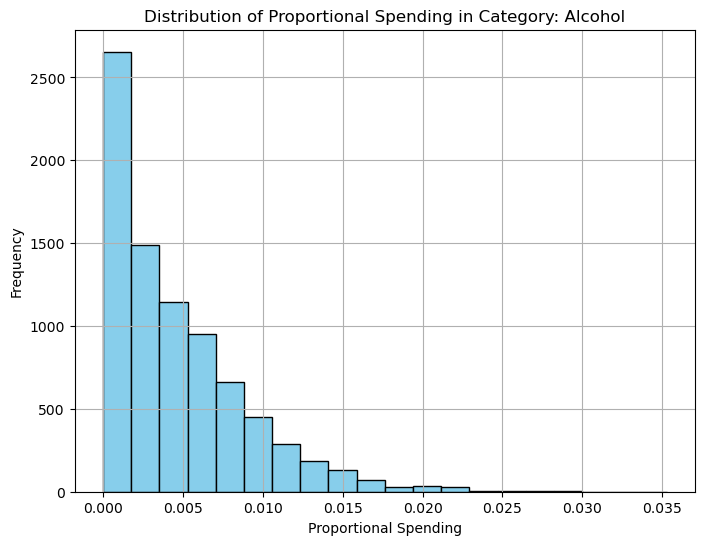

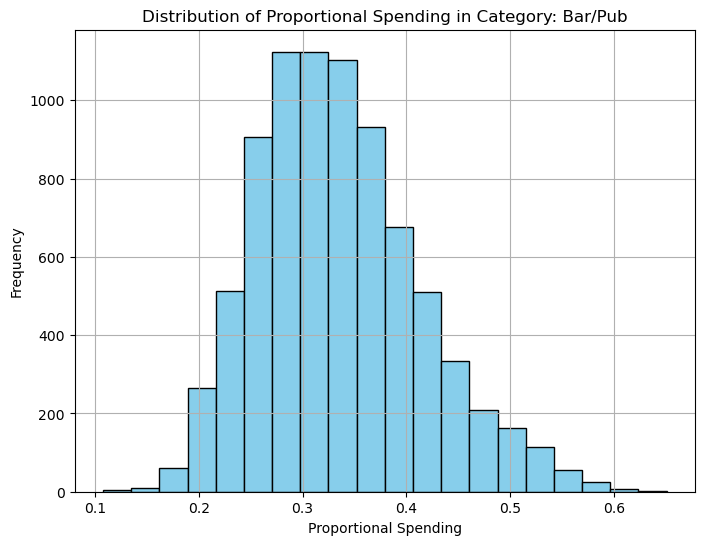

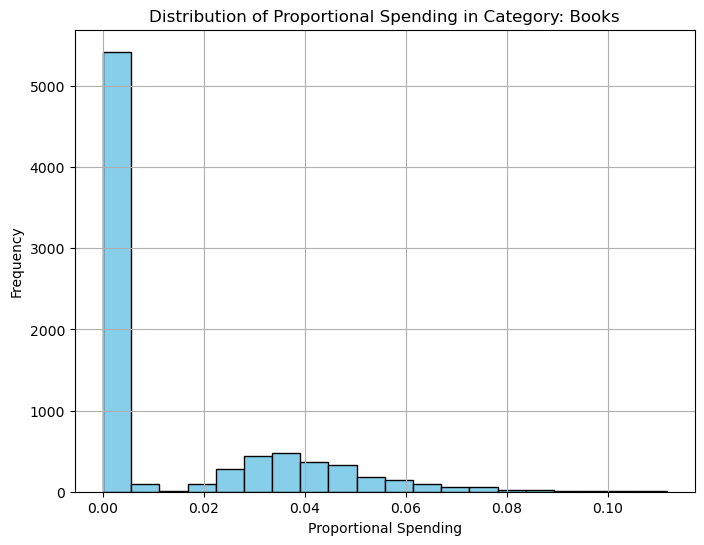

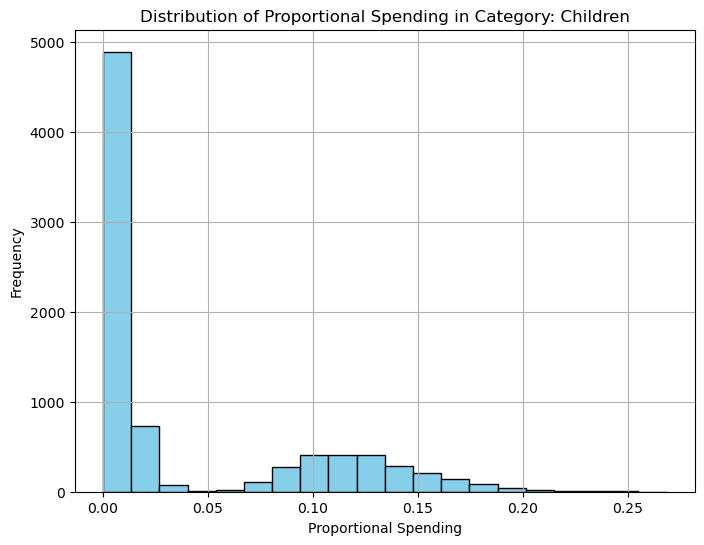

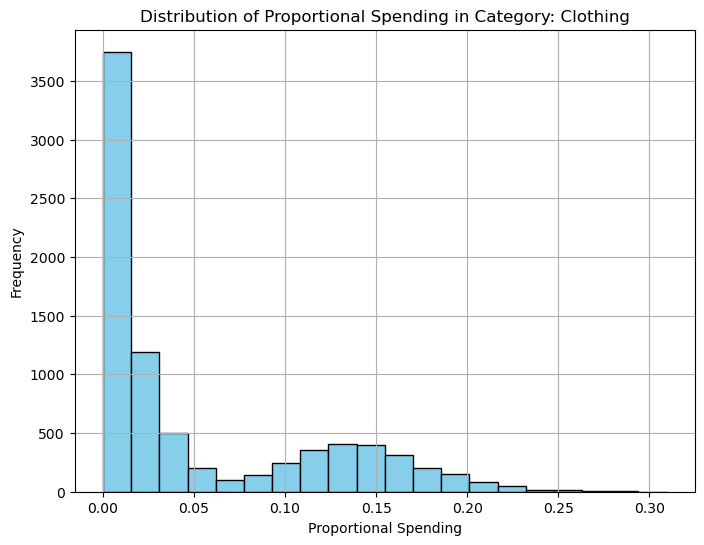

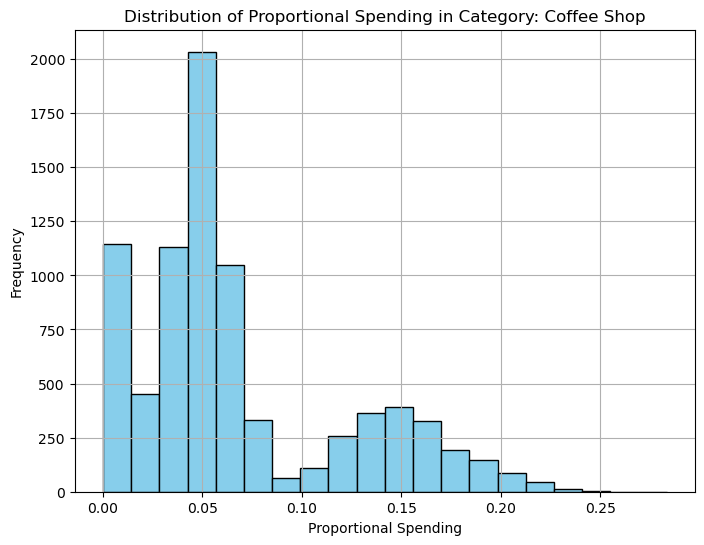

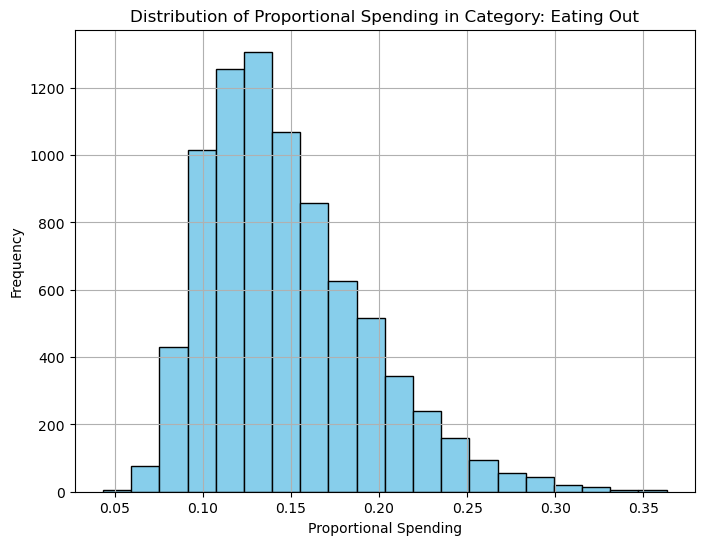

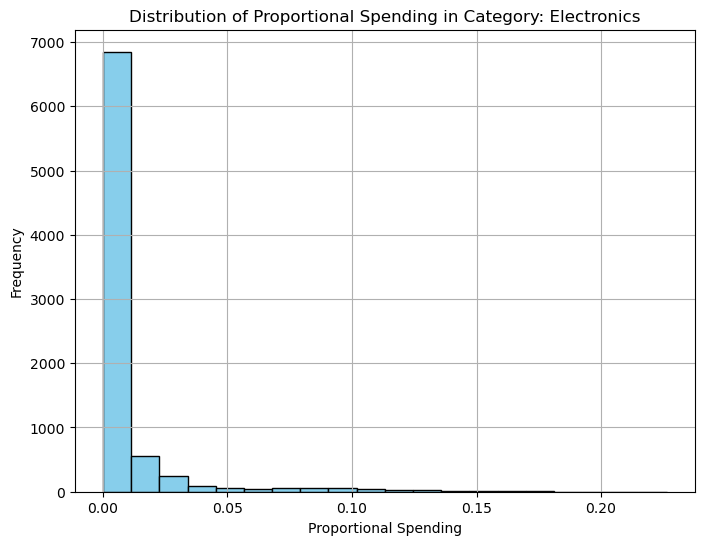

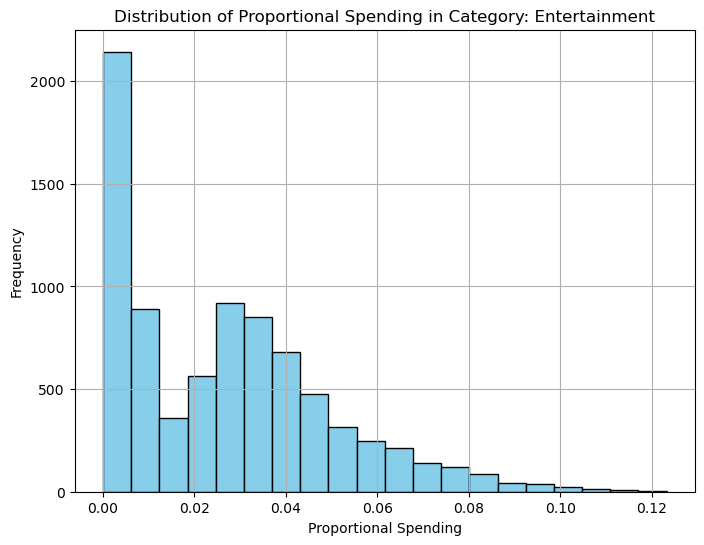

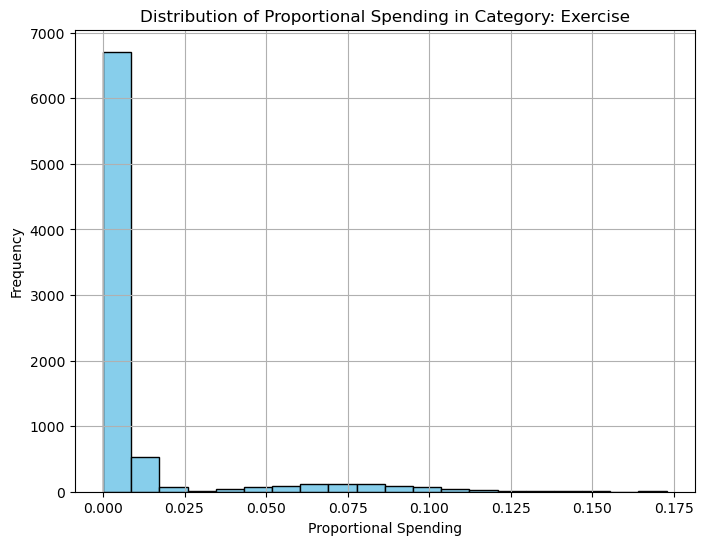

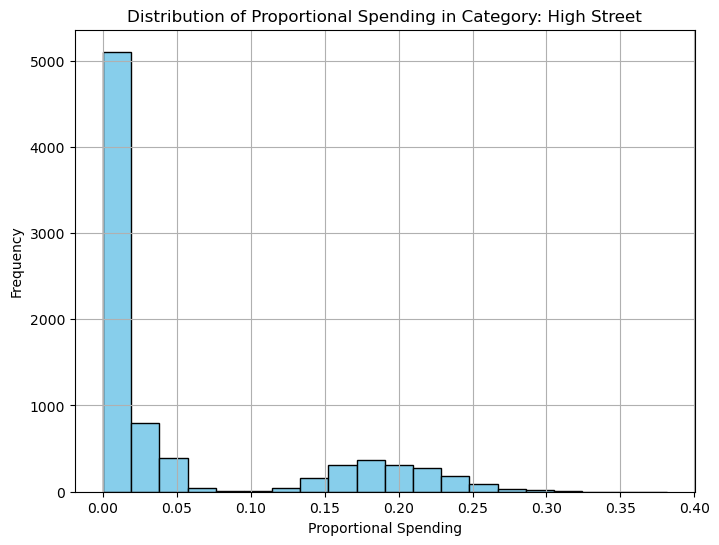

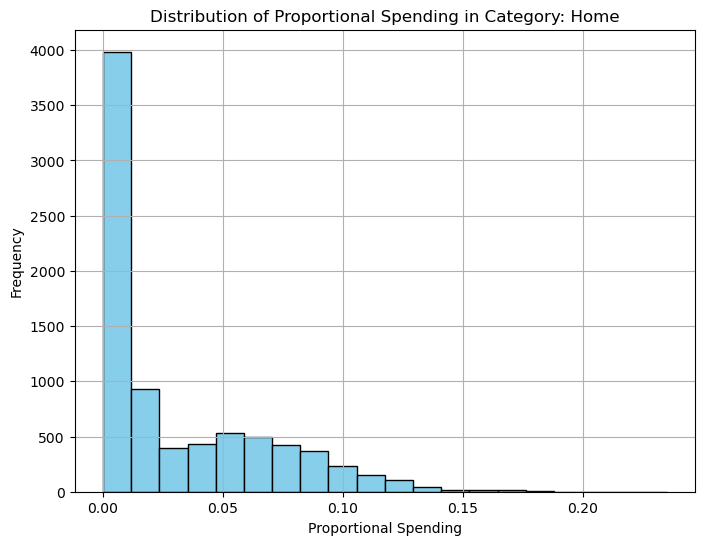

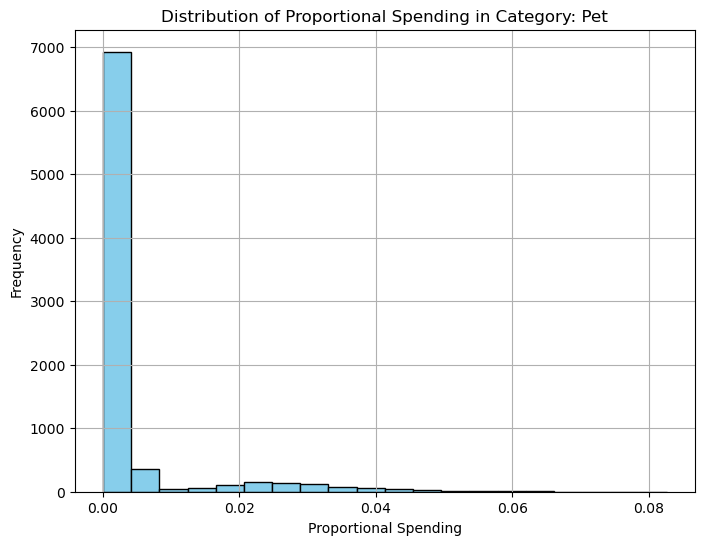

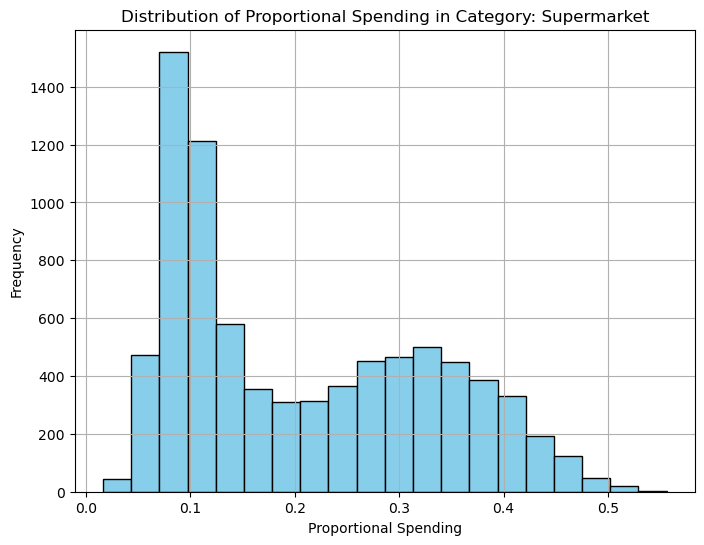

In [20]:
for category in proportion_category_spending.columns:
    plt.figure(figsize=(8, 6))
    plt.hist(proportion_category_spending[category], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Proportional Spending in Category: {category}')
    plt.xlabel('Proportional Spending')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

In [21]:
proportion_category_spending

category,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket
0,0.000954,0.449850,0.000763,0.015259,0.013829,0.192970,0.162739,0.000000,0.039281,0.000000,0.000000,0.008869,0.050451,0.065036
1,0.005460,0.498538,0.000000,0.029271,0.006772,0.057354,0.167893,0.000000,0.105932,0.012342,0.002235,0.000000,0.000000,0.114204
2,0.003939,0.287744,0.027998,0.100574,0.004417,0.141072,0.110303,0.000000,0.047357,0.000000,0.210326,0.002990,0.000000,0.063280
3,0.002653,0.224114,0.001769,0.005219,0.185147,0.004130,0.165541,0.000000,0.011942,0.000000,0.175041,0.107833,0.002654,0.113956
4,0.007990,0.300642,0.000000,0.010122,0.203665,0.062369,0.203119,0.006013,0.051440,0.000000,0.004996,0.064463,0.000000,0.085182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8137,0.016106,0.364726,0.022745,0.011276,0.020167,0.046096,0.093518,0.010954,0.082595,0.104188,0.157601,0.000000,0.000000,0.070029
8138,0.006955,0.326674,0.038336,0.000000,0.014431,0.045500,0.113403,0.000000,0.021675,0.000000,0.001453,0.008511,0.000000,0.423061
8139,0.004377,0.308220,0.031465,0.007506,0.008195,0.048781,0.170683,0.017265,0.029143,0.005630,0.006028,0.006130,0.000000,0.356578
8140,0.005052,0.389036,0.002764,0.000000,0.053545,0.006361,0.141588,0.000000,0.034897,0.060494,0.000395,0.000000,0.000790,0.305078


Finding the average spending proportions per category and then calculating the over/under spending of each account in each category as a percentage of the average. This means the categories will be standardised (if average spending in Pub/Bar is 35%, it may dominate a model and therrefore reduce insights into smaller categories)

In [22]:
average_spending_per_category = proportion_category_spending.mean()

In [23]:
average_spending_per_category

category
Alcohol          0.004557
Bar/Pub          0.334692
Books            0.014562
Children         0.041388
Clothing         0.052308
Coffee Shop      0.068043
Eating Out       0.147646
Electronics      0.007146
Entertainment    0.026818
Exercise         0.009759
High Street      0.051889
Home             0.030313
Pet              0.003582
Supermarket      0.207298
dtype: float64

In [24]:
over_under_spending = (proportion_category_spending.sub(average_spending_per_category, axis=1)).div(average_spending_per_category, axis=1)*100

In [25]:
over_under_spending.insert(0, 'Sender account', pivoted_data['from_totally_fake_account'])

In [26]:
over_under_spending

category,Sender account,Alcohol,Bar/Pub,Books,Children,Clothing,Coffee Shop,Eating Out,Electronics,Entertainment,Exercise,High Street,Home,Pet,Supermarket
0,1000.0,-79.069597,34.406893,-94.760573,-63.131088,-73.563198,183.600531,10.222543,-100.000000,46.472798,-100.000000,-100.000000,-70.740073,1308.491257,-68.626908
1,1002.0,19.827940,48.954121,-100.000000,-29.275076,-87.054168,-15.709771,13.713333,-100.000000,295.004129,26.468315,-95.693379,-100.000000,-100.000000,-44.908498
2,1006.0,-13.559208,-14.027398,92.266587,143.004779,-91.555634,107.328610,-25.292153,-100.000000,76.586312,-100.000000,305.335035,-90.135940,-100.000000,-69.473764
3,1018.0,-41.777639,-33.038779,-87.850467,-87.389622,253.953235,-93.929993,12.120550,-100.000000,-55.469683,-100.000000,237.334211,255.737570,-25.910701,-45.027776
4,1053.0,75.348506,-10.173661,-100.000000,-75.542623,289.354255,-8.338734,37.571768,-15.857903,91.811117,-100.000000,-90.372352,112.662834,-100.000000,-58.908604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8137,100931.0,253.461574,8.973518,56.193386,-72.755899,-61.445121,-32.253829,-36.660688,53.289127,207.983704,967.603633,203.723875,-100.000000,-100.000000,-66.218010
8138,100934.0,52.641581,-2.395757,163.259115,-100.000000,-72.411039,-33.130154,-23.192390,-100.000000,-19.176844,-100.000000,-97.198859,-71.923179,-100.000000,104.083696
8139,100947.0,-3.942523,-7.909325,116.074506,-81.863090,-84.334152,-28.308832,15.603378,141.612346,8.668093,-42.311381,-88.383583,-79.776419,-100.000000,72.012191
8140,100986.0,10.873251,16.236801,-81.018317,-100.000000,2.363102,-90.650940,-4.102674,-100.000000,30.125812,519.879868,-99.239014,-100.000000,-77.951893,47.168950


In [27]:
over_under_spending.to_csv('Proportional_spending_by_account_percentage.csv', index=False)

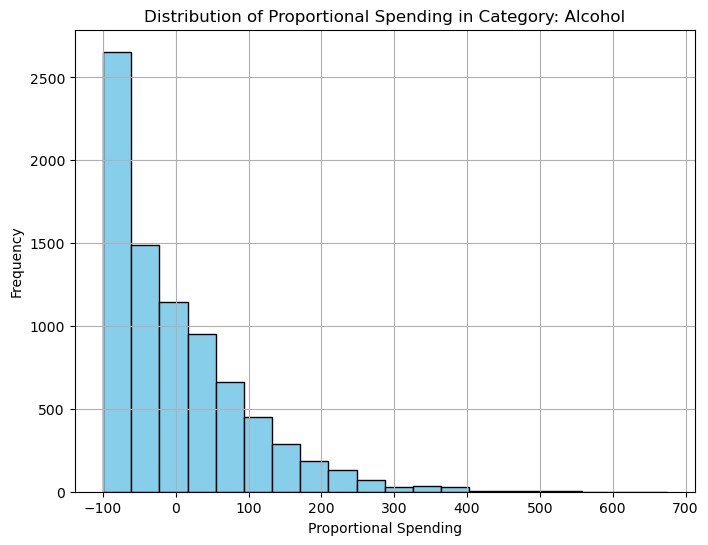

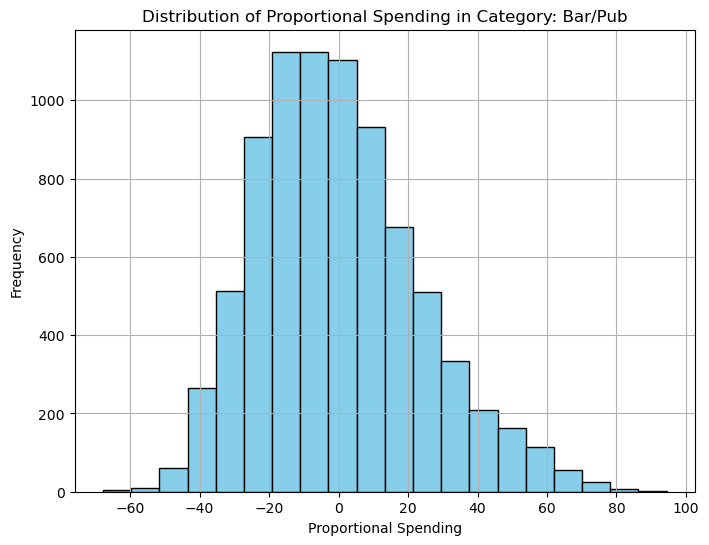

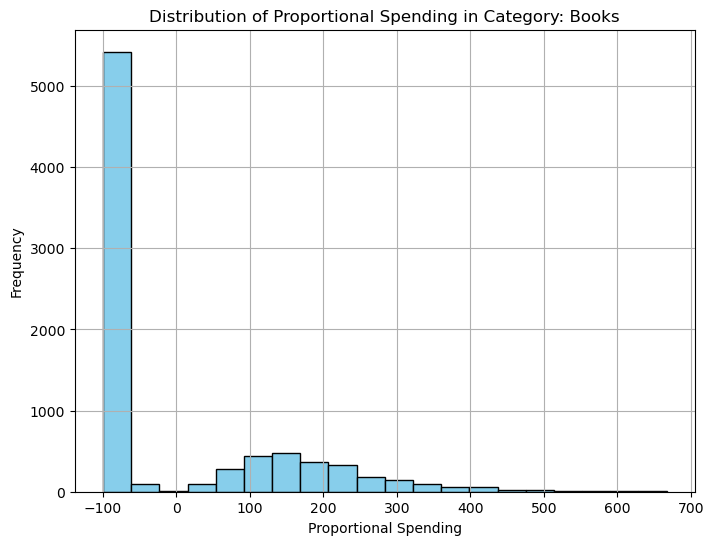

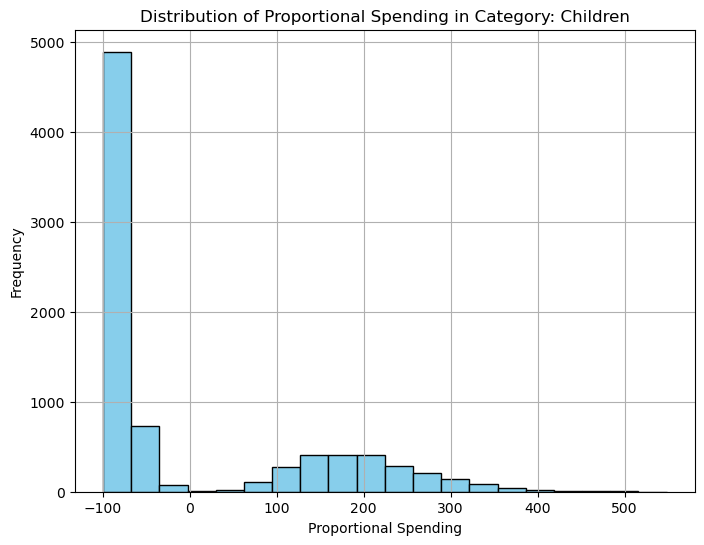

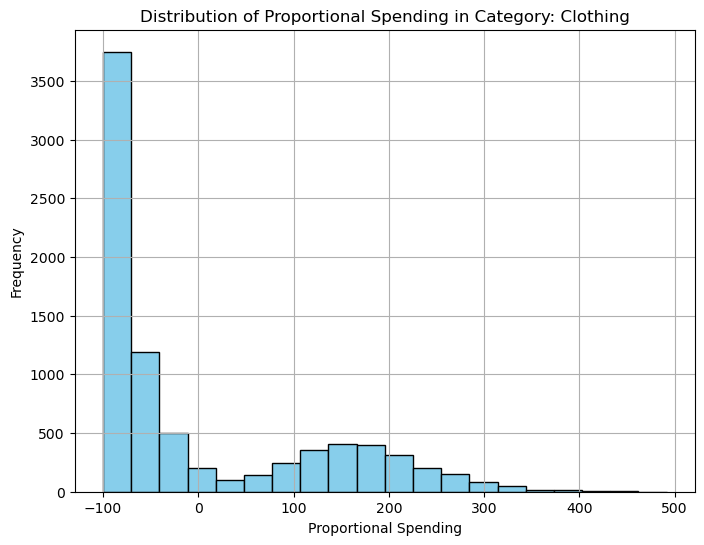

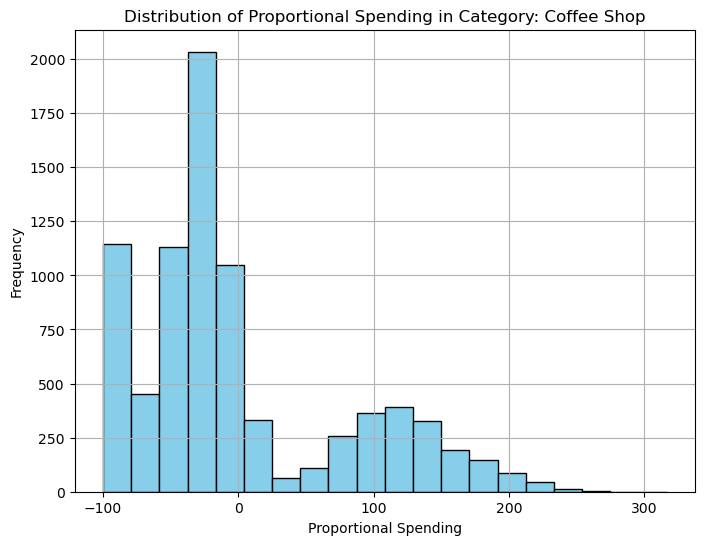

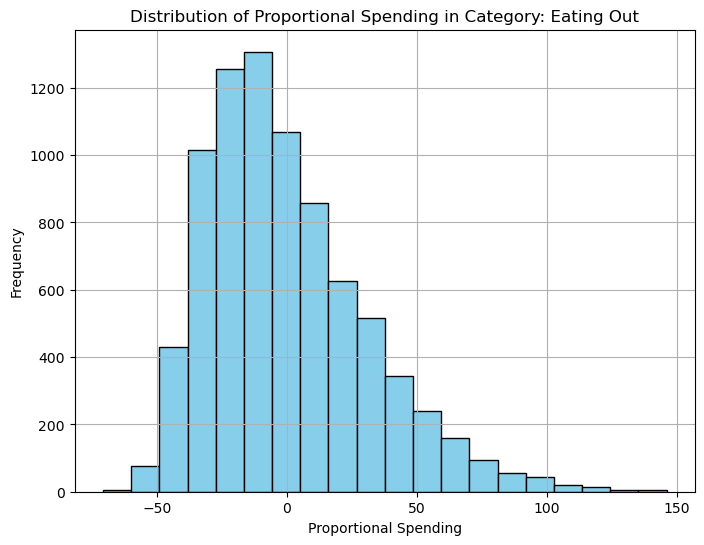

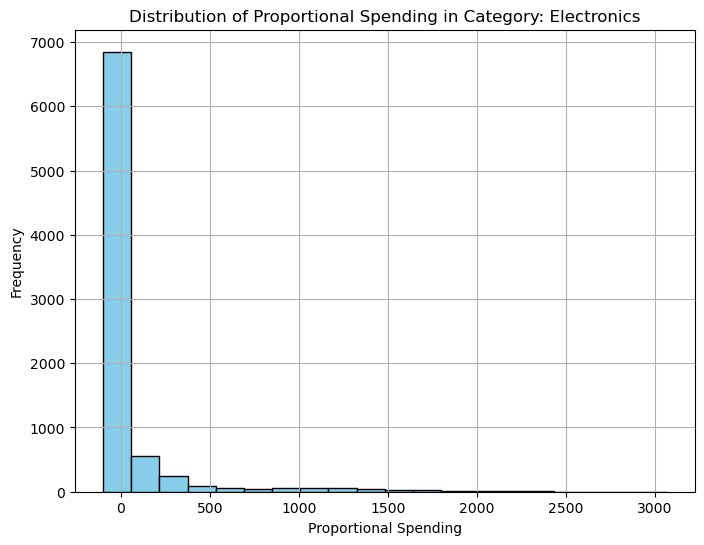

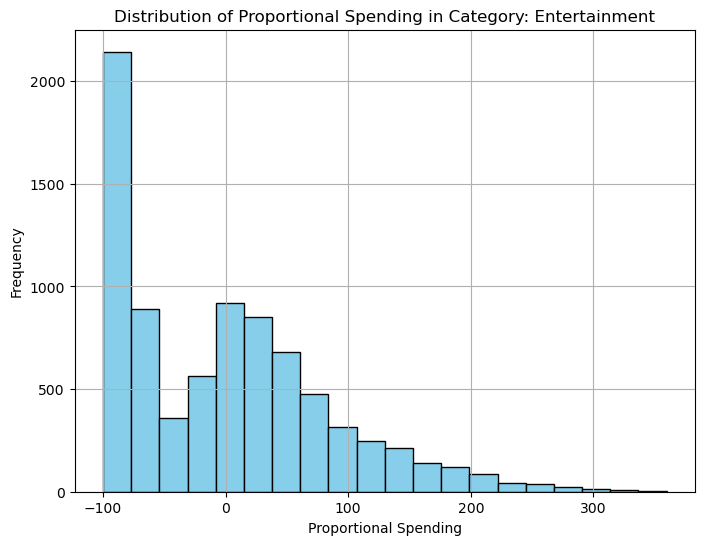

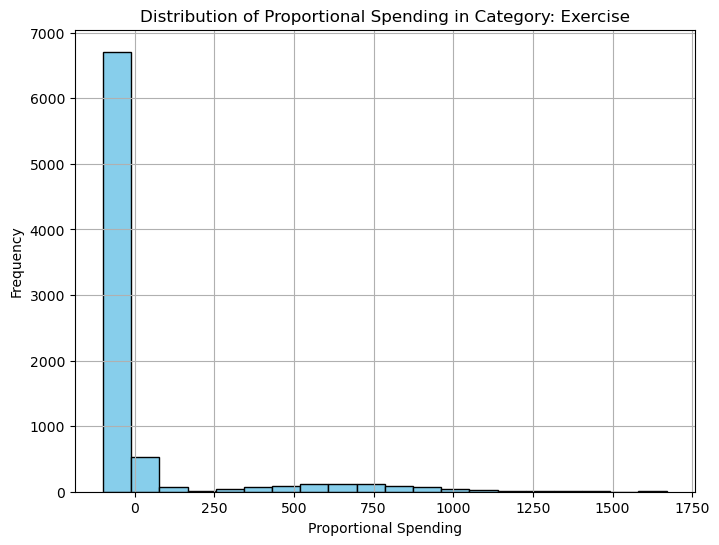

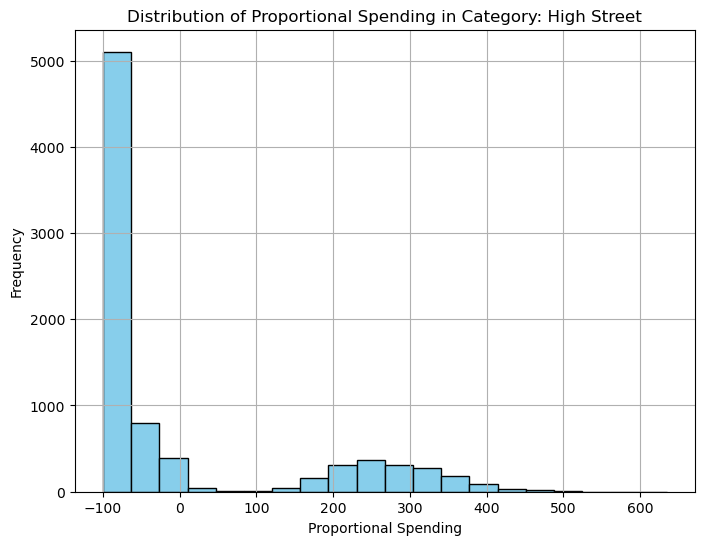

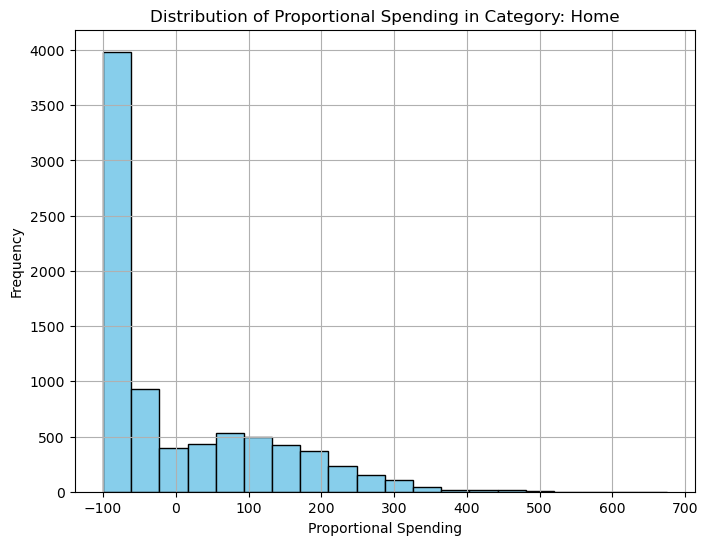

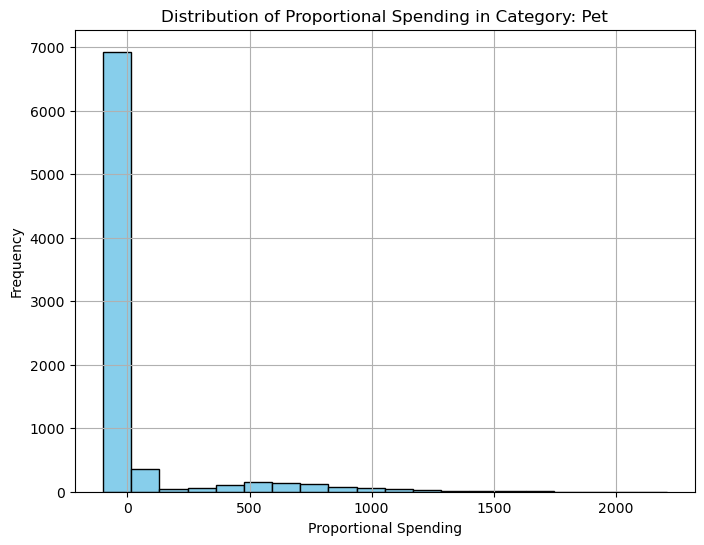

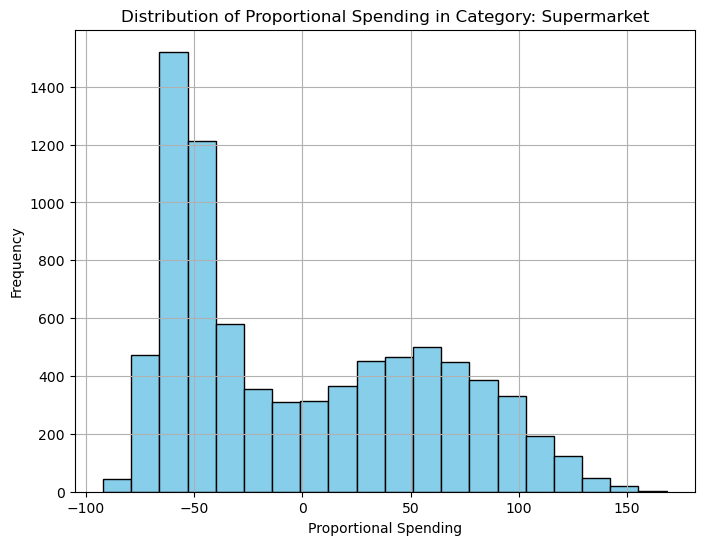

In [32]:
for category in over_under_spending.drop('Sender account', axis=1).columns:
    plt.figure(figsize=(8, 6))
    plt.hist(over_under_spending[category], bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribution of Proportional Spending in Category: {category}')
    plt.xlabel('Proportional Spending')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()